<a href="https://colab.research.google.com/github/kaist-sep-data-science-g/covid-classifier/blob/master/Test_200618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#np.load 사용할때 에러 발생
#ValueError: Object arrays cannot be loaded when allow_pickle=False
!pip uninstall numpy
!pip install --upgrade numpy==1.16.1

Uninstalling numpy-1.18.5:
  Would remove:
    /usr/bin/f2py
    /usr/bin/f2py3
    /usr/bin/f2py3.6
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.6
    /usr/local/lib/python3.6/dist-packages/numpy-1.18.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/numpy.libs/libgfortran-ed201abd.so.3.0.0
    /usr/local/lib/python3.6/dist-packages/numpy.libs/libopenblasp-r0-34a18dc3.3.7.so
    /usr/local/lib/python3.6/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.18.5
     |████████████████████████████████| 17.3MB 200kB/s 
ERROR: umap-learn 0.4.4 has requirement numpy>=1.17, but you'll have numpy 1.16.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import os, glob, numpy as np
np.__version__

'1.16.1'

In [ ]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/train"
categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]

nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
  #one-hot 돌리기.
  label = [0 for i in range(nb_classes)]
  label[idx] = 1

  image_dir = file_dir + "/" + cat
  files = glob.glob(image_dir+"/*.*")
  #files = files[:1300]
  print(cat, " 파일 개수 : ", len(files))

  y.append(label)
  z = np.array(y)
  print(z[idx])
  print(label)

Pnemonia_Virus_COVID  파일 개수 :  58
[1 0 0 0]
[1, 0, 0, 0]
Pnemonia_Virus_Unknown  파일 개수 :  1300
[0 1 0 0]
[0, 1, 0, 0]
Pnemonia_Bacteria  파일 개수 :  1300
[0 0 1 0]
[0, 0, 1, 0]
Normal  파일 개수 :  1300
[0 0 0 1]
[0, 0, 0, 1]


In [ ]:
#multi_image_data.npy 생성했으면 다시 실행안해도 됨
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/train"
categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]

nb_classes = len(categories)

image_w = 224
image_h = 224

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = file_dir + "/" + cat
    files = glob.glob(image_dir+"/*.*")
    #files = files[:1300]
    print(cat, " 파일 개수 : ", len(files))

    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        #if i % 700 == 0:
        #    print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data_1300.npy", xy)

print("ok", len(y))

Pnemonia_Virus_COVID  파일 개수 :  58
Pnemonia_Virus_Unknown  파일 개수 :  1300
Pnemonia_Bacteria  파일 개수 :  1300
Normal  파일 개수 :  1300
ok 3958


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
test_data_dir = '/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/test'

test_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical')

Using TensorFlow backend.


Found 624 images belonging to 4 classes.


In [ ]:
#import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AvgPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf

X_train, X_test, y_train, y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data.npy')
#X_train, X_test, y_train, y_test = np.load('/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/multi_image_data_1300.npy')
print(X_train.shape)
print(X_train.shape[0])

print(X_test.shape)
print(X_test.shape[0])

Using TensorFlow backend.


(2968, 224, 224, 3)
2968
(990, 224, 224, 3)
990


In [ ]:
categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [ ]:
"""
##############################################################################################
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = '/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
#checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
#early_stopping = EarlyStopping(monitor='val_loss', patience=6)
##############################################################################################
"""

##############################################################################################
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.5))

# model = Sequential()
# model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
# model.add(Conv2D(250, (3,3), padding="same", activation='relu'))

# model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
# model.add(AvgPool2D(2, 2))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
# model.add(AvgPool2D(2, 2))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (2,2), padding="same", activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
    
# model.add(Flatten())
# model.add(Dense(32))
# model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_dir = '/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
#checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
#early_stopping = EarlyStopping(monitor='val_loss', patience=6)
##############################################################################################


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [ ]:
#model.fit(입력데이터, 라벨값, 몇개의 샘플로 가중치 갱신, 학습 반복 횟수)
#history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Train on 2968 samples, validate on 990 samples
Epoch 1/10
2968/2968 [==============================] - 13s 4ms/step - loss: 1.3127 - accuracy: 0.5923 - val_loss: 0.6751 - val_accuracy: 0.7091
Epoch 2/10
2968/2968 [==============================] - 10s 4ms/step - loss: 0.6785 - accuracy: 0.7247 - val_loss: 0.5688 - val_accuracy: 0.7596
Epoch 3/10
2968/2968 [==============================] - 10s 4ms/step - loss: 0.5407 - accuracy: 0.7726 - val_loss: 0.4975 - val_accuracy: 0.7758
Epoch 4/10
2968/2968 [==============================] - 10s 4ms/step - loss: 0.4690 - accuracy: 0.7948 - val_loss: 0.4837 - val_accuracy: 0.7939
Epoch 5/10
2968/2968 [==============================] - 10s 4ms/step - loss: 0.4307 - accuracy: 0.8282 - val_loss: 0.5815 - val_accuracy: 0.7475
Epoch 6/10
2968/2968 [==============================] - 10s 4ms/step - loss: 0.3727 - accuracy: 0.8427 - val_loss: 0.5013 - val_accuracy: 0.7828
Epoch 7/10
2968/2968 [==============================] - 10s 4ms/step - loss: 0.3420

In [ ]:
#print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

# 모델 평가하기 
score = model.evaluate(X_test, y_test)
print('loss=', score[0])        # loss
print('accuracy=', score[1])    # acc

1320/1320 [==============================] - 3s 2ms/step
loss= 0.48420025904973346
accuracy= 0.7977272868156433


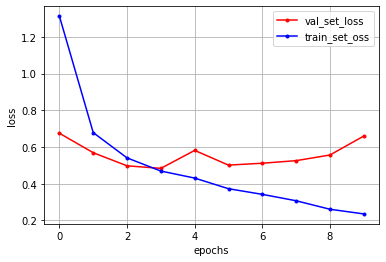

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 7.53%


In [ ]:
scores

[5.169804573059082, 0.07532051205635071]

In [ ]:
# 적용해볼 이미지 
test_image = '/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/imgs_others_test/person1_virus_6.jpeg'
# 이미지 resize
img = Image.open(test_image)
img = img.convert("RGB")
img = img.resize((224,224))
data = np.asarray(img)

X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1, 224, 224,3)
# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print('New data category : ',categories[result[0]])

New data category :  Pnemonia_Bacteria


In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/test"
#file_dir = "/content/gdrive/My Drive/Colab Notebooks/DataScienceProject/Coronahack-Chest-XRay-Dataset/imgs_others_test"

categories = ["Pnemonia_Virus_COVID", "Pnemonia_Virus_Unknown", "Pnemonia_Bacteria", "Normal"]

image_w = 224
image_h = 224

X = []
filenames = []
labels = []
label = 0

sample_cnt = {0:0, 1:10, 2:100, 3:10}

for idx, cat in enumerate(categories):
  image_dir = file_dir + "/" + cat
  files = glob.glob(image_dir+"/*.*")
  files = files[:sample_cnt[idx]]
  #print(cat, " 파일 개수 : ", len(files))

  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)
    labels.append(label)
    #print(f)

  label += 1

X = np.array(X)
#model = load_model('/content/gdrive/My Drive/Colab Notebooks/CoronaHack_Chest_X_Ray/model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

#print(prediction)
pred = prediction.argmax(axis=1)
# unique, counts = np.unique(pred, return_counts=True)
# dict_pred = dict(zip(unique, counts))
# print(prediction.argmax(axis=1))
# print(dict_pred[3])

cnt = 0
length = len(pred)
for i in range(length):
  if(pred[i] == labels[i]):
    cnt += 1
print('예측 정확도 : ' + str(cnt/length*100) + '%')


45.57823129251701


In [ ]:
#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "Pnemonia_Virus_COVID"
    elif pre_ans == 1: pre_ans_str = "Pnemonia_Virus_Unknown"
    elif pre_ans == 2: pre_ans_str = "Pnemonia_Bacteria"
    else: pre_ans_str = "Normal"

    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")

    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[0.000 0.000 1.000 0.000]
2


IndexError: ignored